In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [16]:
#데이터를 읽어오는 함수입니다. read_csv 함수 안에는 csv 파일 경로를 작성해야하는데, 길어지면 헷갈리니 같은 폴더 안에 csv 파일을 위치시켜주세요!ㅇ
data = pd.read_csv('student_health_data.csv')
#데이터를 미리 열람하는 코드입니다. 해당 데이터를 통해 어떤 데이터를 전처리해야할 지 파악할 수 있습니다.
data.head(10)
print(data.dtypes)

Student_ID                    int64
Age                           int64
Gender                       object
Heart_Rate                  float64
Blood_Pressure_Systolic     float64
Blood_Pressure_Diastolic    float64
Stress_Level_Biosensor      float64
Stress_Level_Self_Report    float64
Physical_Activity            object
Sleep_Quality                object
Mood                         object
Study_Hours                 float64
Project_Hours               float64
Health_Risk_Level            object
dtype: object


In [4]:
#데이터의 열을 삭제하는 코드입니다. 학생 개개인을 나타내는 student id 열은 삭제합시다.이
data_clean = data.drop('Student_ID', axis=1)

In [5]:
#encoder를 통한 전처리 단계입니다. label encoder은 열에 존재하는 값을 숫자로 바꾸어주는 인코더입니다.
#M-> 0, F-> 1 이런식으로 고유한 문자열 값을 숫자로 치환합니다.
label_encoders = {}

#바꿀 열을 정의하는 배열입니다.
categorical_columns = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood', 'Health_Risk_Level']

In [6]:
#위에 선언한 Label 인코더를 각 열에 적용시킵니다.
for name in categorical_columns:
    le = LabelEncoder()
    data_clean[name] = le.fit_transform(data_clean[name])
    label_encoders[name] = le

In [7]:
#입력으로 줄 x 값과 정답값인 y를 분리합니다.
x = data_clean.drop('Health_Risk_Level', axis=1)
y = data_clean['Health_Risk_Level']

In [8]:
#모델을 학습시킬 데이터와 모델을 평가할 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

In [9]:
#사용할 모델을 선언하고 학습시킵니다.
dt_model = DecisionTreeClassifier(random_state=2024)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2024)

In [10]:
#모델의 정확도, 분류 개수를 시각화 하는 코드입니다.
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = label_encoders['Health_Risk_Level'].classes_)
print(f"정확도(Accuracy):{accuracy}")
print("Classification Report:")
print(classification_rep)

정확도(Accuracy):0.9966666666666667
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.97      0.99        38
         Low       1.00      1.00      1.00        47
    Moderate       1.00      1.00      1.00       215

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



In [11]:
#또 다른 모델은 Random Forest 모델을 선언하고 학습시킵니다.
rf_model = RandomForestClassifier(n_estimators=100, random_state=2024)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

In [12]:
#랜덤 포레스트 모델의 정확도, 분류 개수를 시각화 하는 코드입니다.
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = label_encoders['Health_Risk_Level'].classes_)
print(f"정확도(Accuracy):{accuracy}")
print("Classification Report:")
print(classification_rep)

정확도(Accuracy):0.9966666666666667
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.97      0.99        38
         Low       1.00      1.00      1.00        47
    Moderate       1.00      1.00      1.00       215

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



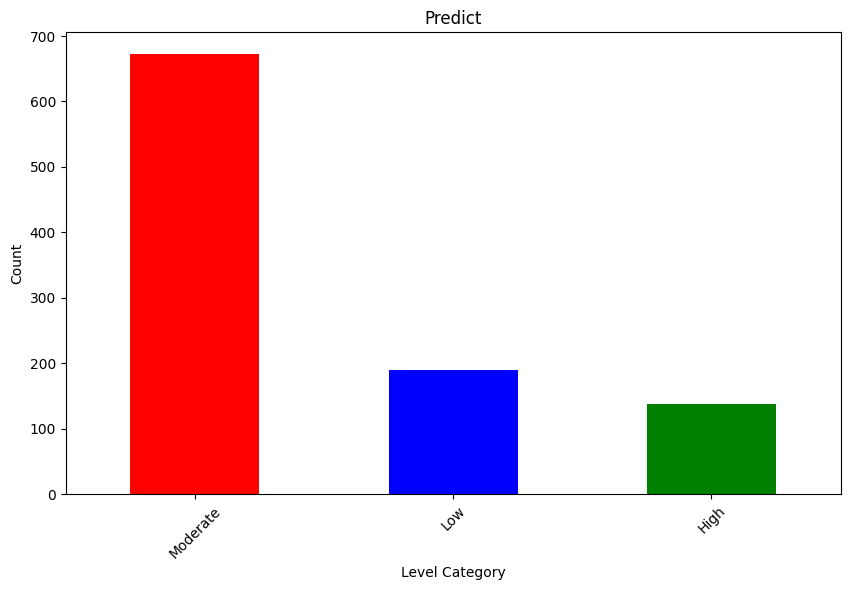

In [13]:
#Category별로 얼마나 존재하는지를 시각화하는 코드입니다.
category_data_label = data['Health_Risk_Level'].value_counts()
colors=['red', 'blue', 'green']
plt.figure(figsize=(10, 6))
category_data_label.plot(kind='bar', color=colors)
plt.title('Predict')
plt.xlabel('Level Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

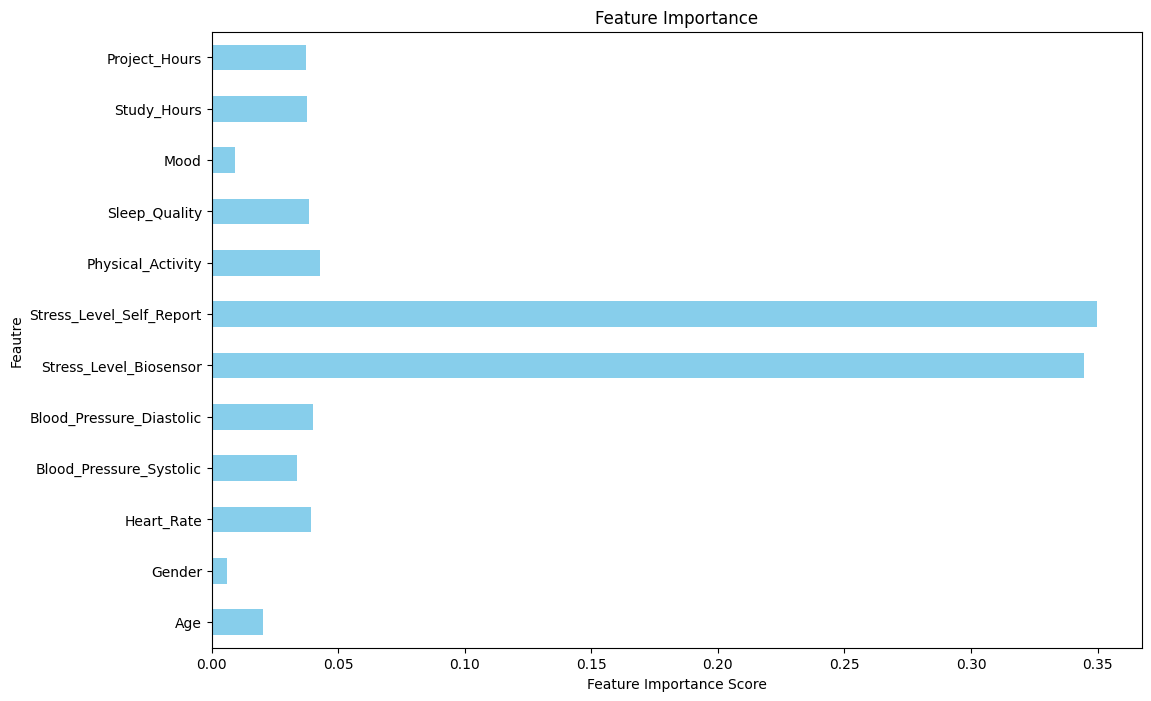

In [14]:
#예측할 때, Feature가 얼마나 영향을 주는지 보여주는 코드입니다.
importance = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(12, 8))
importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feautre')
plt.show()